In [46]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))

In [48]:
from typing import Tuple

import numpy as np
import pandas as pd

from statsmodels.graphics import tsaplots
from dataset import Dataset
import matplotlib.pyplot as plt
import plotting

from statsmodels.tsa.stattools import adfuller

#### Возьмем типичный пример ряда с трендом и сезонностью

In [49]:
dataset = Dataset('../data/dataset/')

In [50]:
ts = dataset['international-airline-passengers-anomaly.csv']

<Axes: xlabel='1949-01'>

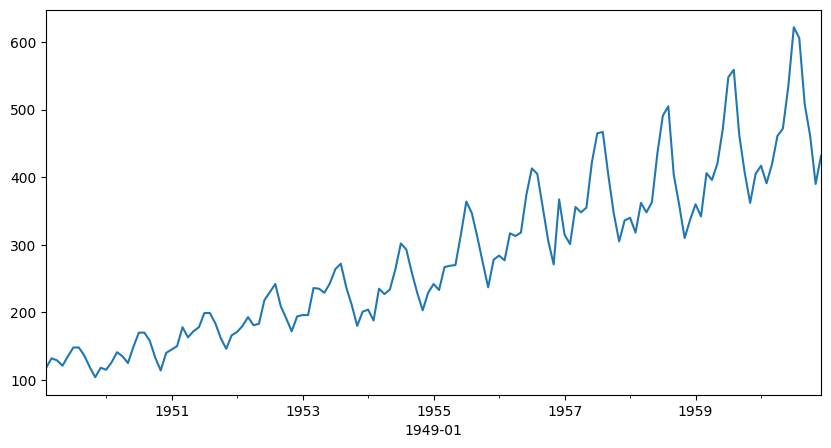

In [51]:
ts.plot(figsize=(10, 5))

### Задание 1 - реализовать "наивную" имплементацию stl-разложения:
    Ряд - stl_example.csv

    0. Убрать гетероскедастичность логарифмированием.
    1. Апроксимировать ряд линейным трендом.
    2. Вычесть линейный тренд из ряда.
    3. Найти период сезонности получившегося ряда по коррелограме.
    4. Получить сезонность ряда без тренда одним из двух способов: 
       а) при помощи медианного фильтра с окном равным период/к, к подобрать, обычно хорошо подходит k={2, 3, 4}. 
       (Чтобы фильтр считался по центру скользящего окна, используйте опцию ts.rolling(k, center=True).median())
       б) продифференцировав его с лагом, равным найденному периоду сезонности и вычтя
       получившийся ряд из исходного
       в)* попробуйте подумать, какие есть плюсы и минусы у каждого из способов?
    4. Вычесть тренд и сезонность, получить остатки.
    6. Проверить остатки на стационарность.

   
detect_ts должна возвращать tuple из: (тренд, сезонность, остатки)

In [52]:
def extract_trend(ts: pd.Series):
    """
    Извлекает линейный тренд из временного ряда
    """
    # <ваш код здесь>
    return trend, k, b

In [53]:
def extract_seasonality(ts_detrended, period=None):
    """
    Извлекает сезонную компоненту
    """
    # <ваш код здесь>
    return season

In [54]:
def extract_seasonality_diff(ts_detrended, period=None):
    """
    Извлекает сезонную компоненту при помощи дифференцирования
    """
    # <ваш код здесь>
    return season

### Задание 2 - найти аномалии во временном ряде при помощи получившихся остатков 

1. Расчитать стандартное отклонение остатков std
2. Получить порог на остатки по формуле `threshold = k * std`, k обычно берется от 2 до 3.
3. Найти аномалии, как точки ряда, абсолютные значения которых превышают найденный порог

### Задание 3 - сделать прогноз ряда на 6 периодов вперед (36 точек)

1. Экстраполируйте линейный тренд.
2. Сделайте рекурсивный прогноз сезонной компоненты по формуле y(t) = y(t-6)
3. Остатки по-хорошему должны моделироваться моделью arma, но в нашем случае сделайте просто прогноз средним значением. (Т.к. в нашем случае это 0, остатки можно вообще проигнорировать)
4. Сложите получившиеся компоненты и получите финальный прогноз
5. profit!

### stl-Разложение "из коробки" - statsmodels. 

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [56]:
decomp = seasonal_decompose(ts, period=12)

<Axes: xlabel='1949-01'>

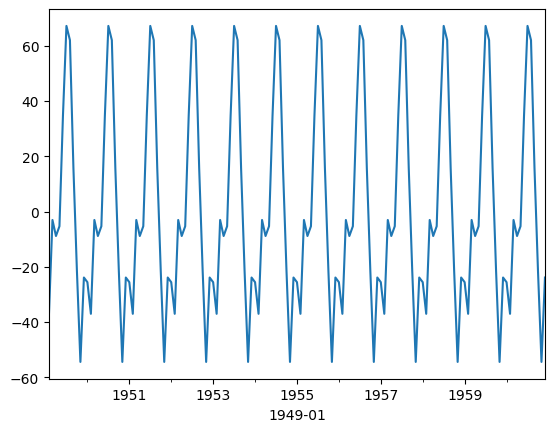

In [57]:
decomp.seasonal.plot()

<Axes: xlabel='1949-01'>

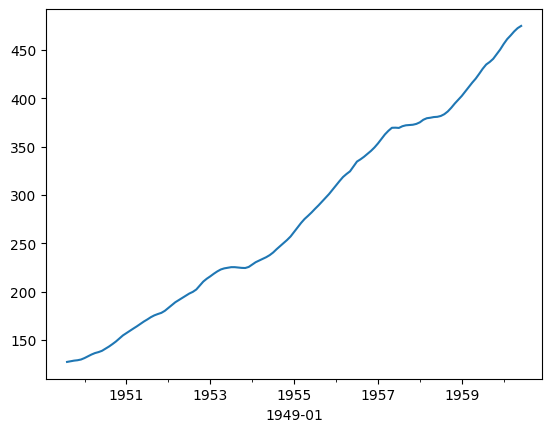

In [58]:
decomp.trend.plot()

<Axes: xlabel='1949-01'>

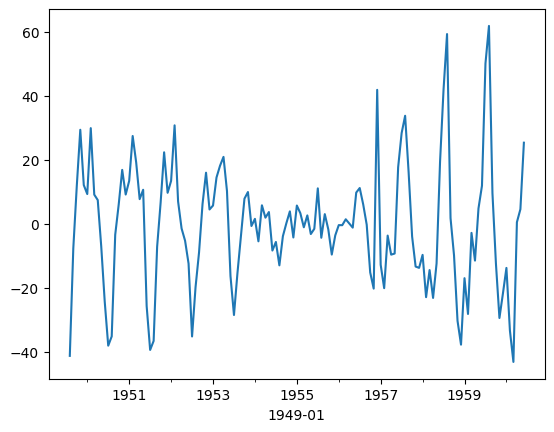

In [59]:
decomp.resid.plot()

In [60]:
adfuller(decomp.resid.dropna())

(-4.493696416365332,
 0.0002018618882739433,
 11,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 898.0353151279705)

### Другие пакеты
- stldecompose (также "наивная реализация")
- pyloess (давно не было обновлений)